PASADENA, 2018: average temperature = 19.46 C
Using ('USW00094728', 40.7789, -73.9692, 39.6, 'NY', 'NEW YORK CNTRL PK TWR', '', 'HCN', '72506').


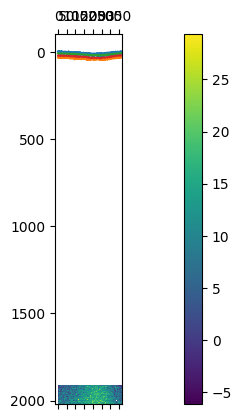

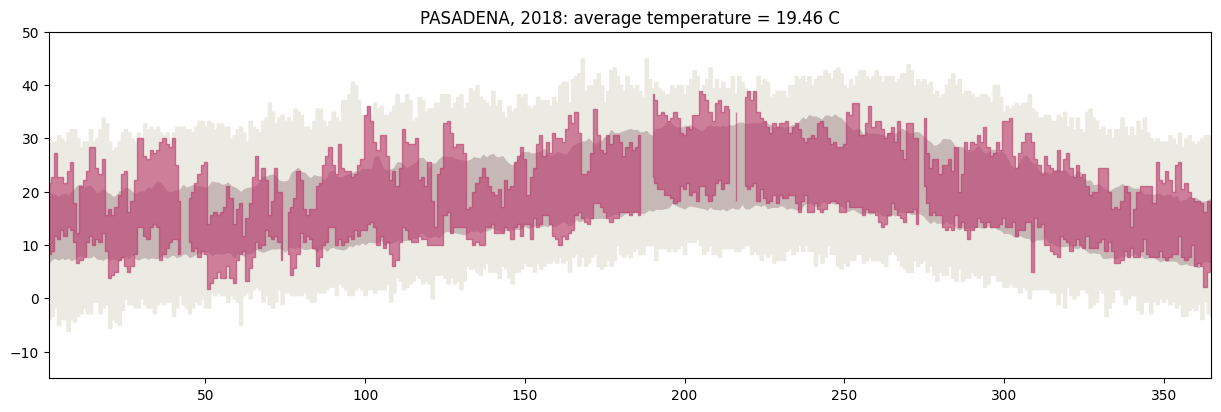

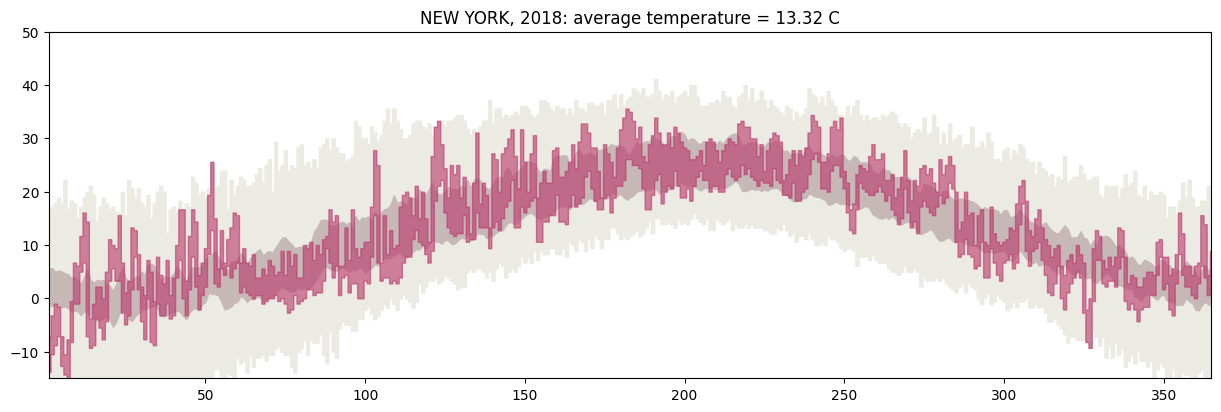

In [15]:
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

# Enable inline plotting for Jupyter
%matplotlib inline

# Import the custom getweather module
import getweather

# Step 1: Get all TMIN/TMAX arrays for the years 1910-2018
allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year)
                      for year in range(1910, 2019)])

# Step 2: Show stacked array as a colored map
pp.matshow(allyears['TMIN'], extent=[1, 365, 2019, 1910])
pp.colorbar()

# Step 3: Calculate record minimum and maximum temperatures across all years
tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

# Plot record minimum and maximum temperatures
pp.plot(tmin_record)
pp.plot(tmax_record)

# Step 4: Get TMIN/TMAX arrays for the years 1981-2010 to calculate normals
normal = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year)
                    for year in range(1981, 2011)])

# Step 5: Calculate normal minimum and maximum temperatures
tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

# Plot normal minimum and maximum temperatures
pp.plot(tmin_normal)
pp.plot(tmax_normal)

# Step 6: Get weather data for a specific year (e.g., 2018)
station, year = 'PASADENA', 2018
thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

# Step 7: Fill area between TMIN and TMAX for the year
days = np.arange(1, 366)
pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

# Step 8: Calculate the average temperature for the year
avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
print(f'{station}, {year}: average temperature = {avg:.2f} C')

# Step 9: Plot normals, records, and current year together
pp.figure(figsize=(15, 4.5))
pp.fill_between(days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step='mid')
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))
pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73, 0.21, 0.41), alpha=0.6, step='mid')
pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
pp.title(f'{station}, {year}: average temperature = {avg:.2f} C')

# Step 10: Define a function to make charts for any city and year
def nyplot(station, year):
    pp.figure(figsize=(15, 4.5))

    allyears = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                          for year in range(1910, 2020)])
    normal = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                        for year in range(1981, 2011)])

    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)
    pp.fill_between(days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step='mid')
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))

    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)
    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73, 0.21, 0.41), alpha=0.6, step='mid')
    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

    avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C')

# Example: Plot for New York, 2018
nyplot('NEW YORK', 2018)
